### Edgar Moises Hernandez-Gonzalez
#### 16/11/19-19/11/19
#### Clasificar RAW con CNN-1D + GRU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 1000, 22))
x_test = x_test.reshape((n_samples_test, 1, 1000, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1000, 22)
(288, 1, 1000, 22)


In [9]:
model = Sequential()
model.add(TimeDistributed(Conv1D(8, 11, activation='relu'), input_shape=(None,1000,22)))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(GRU(16))
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 990, 8)      1944      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 495, 8)      0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 485, 16)     1424      
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 242, 16)     0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 232, 16)     2832      
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 116, 16)     0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 1856)        0         
__________

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 3s 9ms/sample - loss: 1.4132 - acc: 0.2743 - val_loss: 1.3798 - val_acc: 0.2917
Epoch 2/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.3626 - acc: 0.3785 - val_loss: 1.3783 - val_acc: 0.2847
Epoch 3/20
288/288 [==============================] - 1s 2ms/sample - loss: 1.2658 - acc: 0.4444 - val_loss: 1.4056 - val_acc: 0.2604
Epoch 4/20
288/288 [==============================] - 0s 1ms/sample - loss: 1.1556 - acc: 0.5729 - val_loss: 1.4060 - val_acc: 0.2812
Epoch 5/20
288/288 [==============================] - ETA: 0s - loss: 0.9958 - acc: 0.729 - 0s 2ms/sample - loss: 0.9933 - acc: 0.7257 - val_loss: 1.5515 - val_acc: 0.2778
Epoch 6/20
288/288 [==============================] - 0s 2ms/sample - loss: 0.8467 - acc: 0.8229 - val_loss: 1.4886 - val_acc: 0.2778
Epoch 7/20
288/288 [==============================] - 0s 2ms/sample - loss: 0.6613 - acc: 0.8924 - val_loss: 1.5

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 693us/sample - loss: 2.0779 - acc: 0.3090
Test loss: 2.077934424082438
Test accuracy: 0.3090278


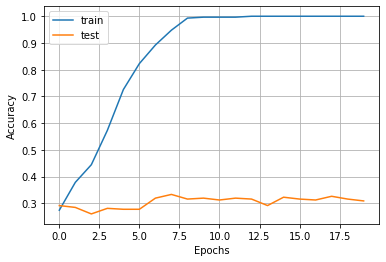

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

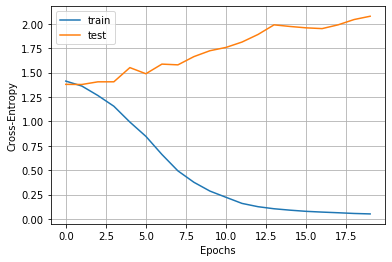

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.07870370370370372


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[33 26  8  5]
 [31 24  9  8]
 [22 25 12 13]
 [22 18 12 20]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.31      0.46      0.37        72
           1       0.26      0.33      0.29        72
           2       0.29      0.17      0.21        72
           3       0.43      0.28      0.34        72

   micro avg       0.31      0.31      0.31       288
   macro avg       0.32      0.31      0.30       288
weighted avg       0.32      0.31      0.30       288

